Python provides us f_oneway() function from SciPy library using which we can conduct the One-Way ANOVA.

## Get ANOVA table

First, we start by using the ordinary least squares (ols) method and then the anova_lm method.

In [92]:
import pandas as pd

# Create data frame
d = {"carbonate": [20.5, 28.1, 27.8, 27.0, 28.0, 25.2, 25.3, 27.1, 20.5, 31.3], 
     "silicate": [26.3, 24.0, 26.2, 20.2, 23.7, 34.0, 17.1, 26.8, 23.7, 24.9],
     "magnetite": [29.5, 34.0, 27.5, 29.4, 27.9, 26.2, 29.9, 29.5, 30.0, 35.6],
     "hematite": [36.5, 44.2, 34.1, 30.3, 31.4, 33.1, 34.1, 32.9, 36.3, 25.5]}
df = pd.DataFrame(d)

# view DataFrame
df

,carbonate,silicate,magnetite,hematite
0,20.5,26.3,29.5,36.5
1,28.1,24.0,34.0,44.2
2,27.8,26.2,27.5,34.1
3,27.0,20.2,29.4,30.3
4,28.0,23.7,27.9,31.4
5,25.2,34.0,26.2,33.1
6,25.3,17.1,29.9,34.1
7,27.1,26.8,29.5,32.9
8,20.5,23.7,30.0,36.3
9,31.3,24.9,35.6,25.5


In [93]:
# Reshape the dataframe : use pd.melt() to unpivot a DataFrame from wide to long format
df = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['carbonate', 'silicate', 'magnetite', 'hematite'])

# view the reshaped dataframe
df

,index,variable,value
0,0,carbonate,20.5
1,1,carbonate,28.1
2,2,carbonate,27.8
3,3,carbonate,27.0
4,4,carbonate,28.0
5,5,carbonate,25.2
6,6,carbonate,25.3
7,7,carbonate,27.1
8,8,carbonate,20.5
9,9,carbonate,31.3


In [94]:
# replace column names
df.columns = ['index', 'Treatment', 'value']

df.head()

,index,Treatment,value
0,0,carbonate,20.5
1,1,carbonate,28.1
2,2,carbonate,27.8
3,3,carbonate,27.0
4,4,carbonate,28.0


<AxesSubplot:xlabel='Treatment', ylabel='value'>

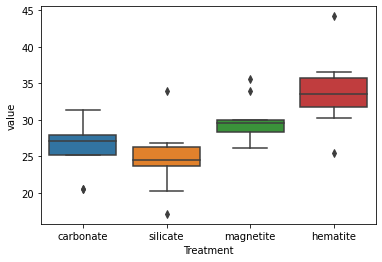

In [95]:
import seaborn as sns

sns.boxplot(x = 'Treatment', y = 'value', data = df)

# df.boxplot(by='Treatment',column =['value'], grid = False)

In [97]:
# import the ols function from the package
from statsmodels.formula.api import ols

model = ols('value ~ C(Treatment)', data=df).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Treatment),3.0,509.122,169.707333,10.849041,0.000032
Residual,36.0,563.134,15.642611,NaN,NaN


In [98]:
import numpy as np
import scipy.stats as stats

I = 4
J = 10

d = {"carbonate": [20.5, 28.1, 27.8, 27.0, 28.0, 25.2, 25.3, 27.1, 20.5, 31.3], 
     "silicate": [26.3, 24.0, 26.2, 20.2, 23.7, 34.0, 17.1, 26.8, 23.7, 24.9],
     "magnetite": [29.5, 34.0, 27.5, 29.4, 27.9, 26.2, 29.9, 29.5, 30.0, 35.6],
     "hematite": [36.5, 44.2, 34.1, 30.3, 31.4, 33.1, 34.1, 32.9, 36.3, 25.5]}
df = pd.DataFrame(d)


x_1 = df["carbonate"].mean()
x_2 = df["silicate"].mean()
x_3 = df["magnetite"].mean()
x_4 = df["hematite"].mean()
x = np.mean([x_1,x_2,x_3,x_4])
MSTr = J/(I-1)*((x_1-x)**2+(x_2-x)**2+(x_3-x)**2+(x_4-x)**2)

s_1 = df["carbonate"].std()
s_2 = df["silicate"].std()
s_3 = df["magnetite"].std()
s_4 = df["hematite"].std()
MSE = 1/I*(s_1**2+s_2**2+s_3**2+s_4**2)
f = MSTr/MSE
p_value = 1- stats.f.cdf(f, I-1,I*(J-1))

print('%.3f' %f, '%.6f' % p_value)


10.849 0.000032


In [99]:
# Import Library
from scipy.stats import f_oneway

# Create Data
carbonate = [20.5, 28.1, 27.8, 27.0, 28.0, 25.2, 25.3, 27.1, 20.5, 31.3]
silicate = [26.3, 24.0, 26.2, 20.2, 23.7, 34.0, 17.1, 26.8, 23.7, 24.9]
magnetite = [29.5, 34.0, 27.5, 29.4, 27.9, 26.2, 29.9, 29.5, 30.0, 35.6]
hematite = [36.5, 44.2, 34.1, 30.3, 31.4, 33.1, 34.1, 32.9, 36.3, 25.5]

# Conduct the one-way ANOVA
f,pvalue = f_oneway(carbonate,silicate,magnetite,hematite)

f, '%.6f' % pvalue



# Display the result in a nicer way...
statistic, pvalue = f_oneway(carbonate,silicate,magnetite,hematite)
print('The resulting one-way ANOVA are the test statistic ' + str(round(statistic,3)) 
      + ' and the p-value ' + str('%.6f' % pvalue))

The resulting one-way ANOVA are the test statistic 10.849 and the p-value 0.000032
